XI.9.2 б)

Требуется получить численное нелинейной краевой задачи.
\begin{cases}
  y'' + \frac{0.5}{1-0.5y} y'^2 = 0, \space{} 0 < x \leq 1 \\
  y(0) = 0 \equiv Y_0 \\
  y(1) = 0 \\
\end{cases}
$y_0 = 0,25; 0,5; 1; 1,5; 1,8; 1,9; 1,95.$

Вводим замену $\zeta = y'$. Тогда данная система примет вид:
\begin{cases}
  \zeta' = -\frac{0.5}{1 - 0.5y} \zeta^2 = -\frac{1}{2 - y} \zeta^2\\
  y(0) = 0 \\
  y(1) = 0 \\
\end{cases}

Введём пристрелочный параметр $\alpha$: $y'(0) \equiv \zeta(0) = \alpha$.

Тогда система примет вид:

\begin{cases}
  \zeta = y' \\
  \zeta' = - \frac{1}{2 - y} \zeta^2 \\
  \zeta(0) = \alpha \\
  y(0) = 0 \\
  y(1) = 0 \\
\end{cases}

Введём новую функцию $u = \frac{\partial y}{\partial \alpha}$. Она определится линейным уравнением в вариациях:

$$u'' =  \frac{\partial f}{\partial y} u + \frac{\partial f}{\partial y'} u'$$

Составим задачу Коши для нахождения $F'(\alpha)$:

\begin{cases}
  u' = v\\
  u'' \equiv v' = -\frac{\zeta ^ 2}{(y - 2) ^ 2} u + 2 \frac{1}{y - 2} \zeta v \\
  u(0) = 0 \\
  u'(0) \equiv v(0) = 0 \\
\end{cases}

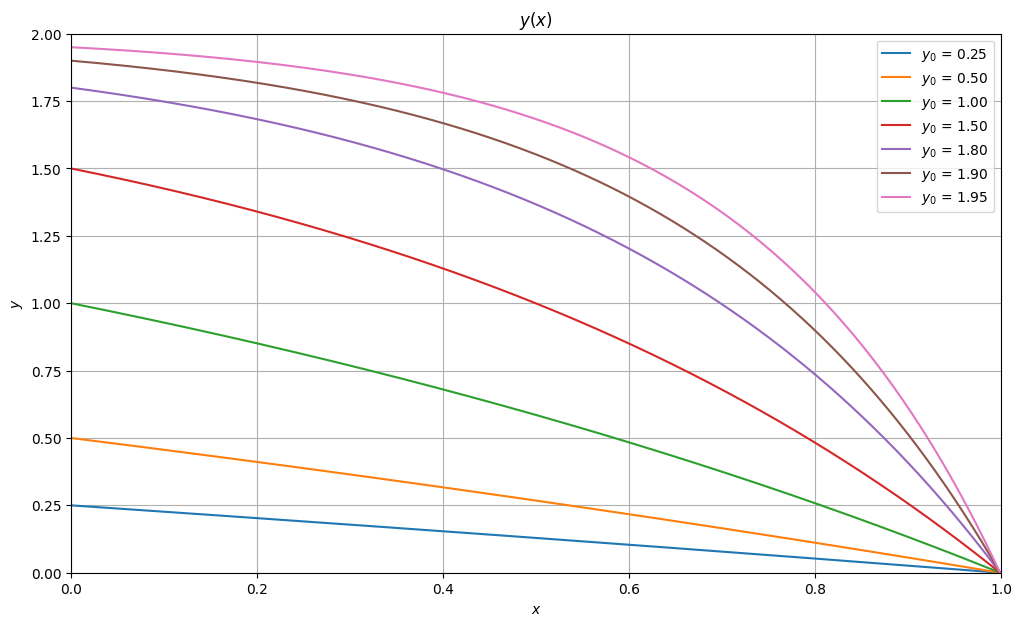

In [4]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 1
given_y0 = np.array([0.25, 0.50, 1.00, 1.50, 1.80, 1.90, 1.95])
HOP = 1E-3
PREC = 1E-5

def foo_f(x, y):
    return np.array([y[1], -y[1] ** 2 / (2 - y[0])])

def foo_v(v, x, y):
    return np.array([v[1], -(y[1] ** 2) / ((y[0] - 2) ** 2) * v[0] + 2 * y[1] / (y[0] - 2) * v[1]])

def mrk_fir(x, y):
	k1 = foo_f(x, y) * HOP
	k2 = foo_f(x + HOP / 2, y + k1 / 2) * HOP
	k3 = foo_f(x + HOP, y - k1 + 2 * k2) * HOP
	return (k1 + 4 * k2 + k3) / 6

def mrk_sec(v, x, y):
	k1 = foo_v(v, x, y) * HOP
	k2 = foo_v(v + k1 / 2, x, y) * HOP
	k3 = foo_v(v - k1 + 2 * k2, x, y) * HOP
	return (k1 + 4 * k2 + k3) / 6

def Newton(y0, alpha, ):
    x = np.arange(0, 1, HOP)
    size = np.shape(x)[0]
    y = np.zeros((int(size), 2))
    y[0] = np.array([y0, alpha])
    v = np.zeros((int(size), 2))
    v[0] = np.array([0, 1])
    for i in range(1, size):
        y[i] = y[i - 1] + mrk_fir(x[i - 1], y[i - 1])
        v[i] = v[i - 1] + mrk_sec(v[i - 1], x[i - 1], y[i - 1])
    return alpha - y[-1, 0] / v[-1, 0], x, y[:, 0]

fig = plt.figure(figsize=[12, 7])
plt.title('$y(x)$')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()

for y in given_y0:
    while(True):
        iter_alpha, x, res = Newton(y, alpha)
        if(np.abs(iter_alpha - alpha) < PREC):
            break
        alpha = iter_alpha
    plt.plot(x, res, '-', label=str("$y_0$ = {:.2f}".format(y)))
plt.xlim([0, 1])
plt.ylim([0, 2])

plt.legend()
plt.show()